## 1. Obtener datos

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

## 2. Exploración de los datos

In [2]:
# ¿Cuánta información tengo?
housing.shape

(20640, 10)

In [3]:
len(housing)

20640

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.size

206400

In [7]:
# ¿Cuánta información faltante tenemos? 
# 207 nulos en total_bedrooms
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
# ¿Qué estadísticas (media, desviación estándar) tienen los datos?
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
# ¿Qué podemos saber sobre ocean_proximity? ¿Cuántos valores únicos hay?
housing.describe(include='object')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [12]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd738932210>,
      dtype=object)

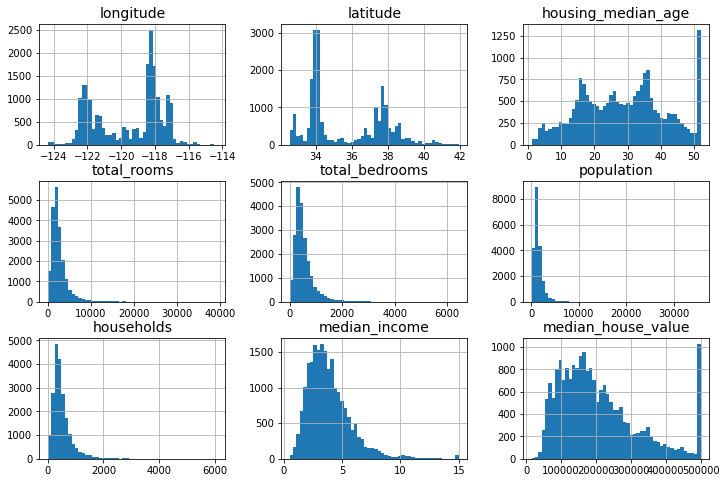

In [13]:
# ¿Cómo están distribuidos los datos de cada columna?
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))

In [14]:
# ¿Cómo están correlacionadas las variables?
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


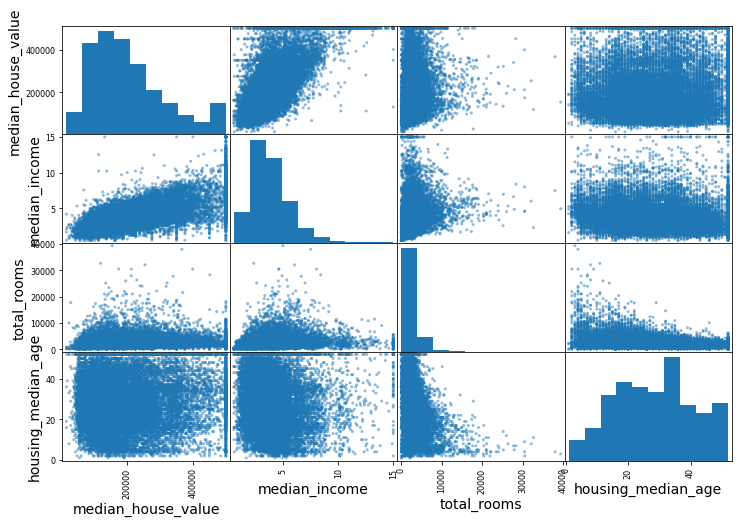

In [15]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

In [16]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [17]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [18]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


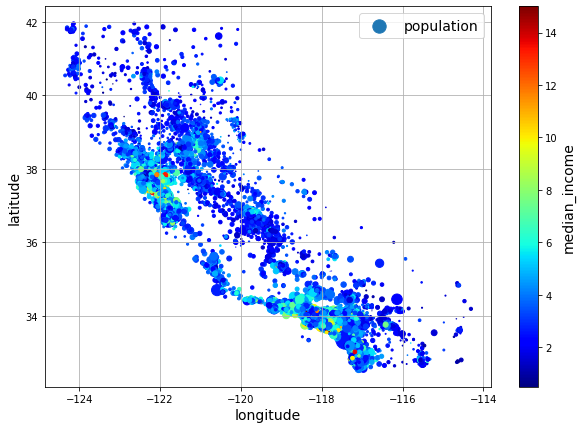

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing['population']/100, label="population",
             c="median_income", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
#save_fig("housing_prices_scatterplot")  # extra code
plt.show()

## 3. Preparar datos

### 3.1 Limpiar datos

In [20]:
# Opción quitar la columna con NA
housing.dropna(axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,people_per_house
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209


In [21]:
# Opción quitar filas con na
housing.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [22]:
# Opcion rellenar con mediana
median_total_bedrooms = housing['total_bedrooms'].median()
print(median_total_bedrooms)
df_housing = housing.fillna(median_total_bedrooms)

435.0


In [23]:
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


## 4. Preparación de un pipeline de entrenamiento

Scikit-learn ofrece una variedad de operaciones de preprocesamiento listas para usarse, así como también la posibilidad de crear tareas de preprocesamiento personalizadas. Algunos ejemplos son:
1. StandardScaler
2. MinMaxScaler
3. RobustScaler: Como StandardScaler pero elimina outliers.
4. QuantileTransformer: Convierte los datos a una distribución uniforme.
5. PowerTransformer: Modifica los datos de tal manera que su distribución se convierta en una distribución normal.
6. OrdinalEncoder: Convierte un conjunto de etiquetas categóricas a enteros.
7. OneHotEncoder
8. KBinsDiscretizer: Discretiza los valores de una columna numérica en el número de bins indicados.
9. Binarizer: Aplica un umbral a los datos para generar una variable binaria.
10. PolynomialFeatures: Convierte un conjunto de variables en su forma polinomial.
11. FunctionTransformer: Aplica una función definida por nosotros como una transformación de scikit learn.
12. ColumnTransformer: Aplica una transformación a un grupo diferentes de columnas en lugar de a todo el dataset.

#### ¿Qué transformación requiere cada columna?

* longitude: númerica. Lo importante es su posición en el mapa 2D, no de forma individual.
* latitude: númerica. Lo importante es su posición en el mapa 2D, no de forma individual.
* housing median age: númerica
* total rooms: númerica
* total bedroom: númerica
* population: númerica
* households: númerica
* median income: númerica
* median house value: númerica
* ocean proximity: categorica

1. Las variables numéricas podemos aplicarles un StandardScaler y para manejar los NA un SimpleImputer.
2. A las variables categóricas podemos convertirlas en One Hot Encoding.

In [24]:
# Parche
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in 1.0.0."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if self.feature_names_out is None:
                return default_get_feature_names_out(self, names)
            elif callable(self.feature_names_out):
                return self.feature_names_out(names)
            else:
                return self.feature_names_out

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

Monkey-patching SimpleImputer.get_feature_names_out()
Monkey-patching FunctionTransformer.get_feature_names_out()


In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

# Pipeline para las columnas numéricas
basic_num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

# Pipeline para las columnas categoricas
basic_cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

# Pipeline de preprocesamiento integrado
basic_preprocessing = make_column_transformer((basic_num_pipeline, num_attribs), (basic_cat_pipeline, cat_attribs))

In [26]:
# Preprocesamiento de datos
descriptors = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity'] 

labels = ['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(housing[descriptors], housing[labels], train_size=0.8)

In [27]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13315,-117.60,33.42,23.0,2482.0,461.0,1048.0,425.0,4.6650,NEAR OCEAN
2352,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,<1H OCEAN
15247,-122.92,41.70,23.0,4017.0,792.0,1634.0,619.0,2.3571,INLAND
9364,-118.24,33.99,28.0,312.0,89.0,498.0,87.0,2.4107,<1H OCEAN
602,-121.65,37.11,14.0,6006.0,914.0,2915.0,898.0,5.9356,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
14880,-117.92,34.12,32.0,2552.0,576.0,2161.0,548.0,2.9459,<1H OCEAN
8519,-118.96,35.38,41.0,2417.0,435.0,973.0,406.0,3.0568,INLAND
7289,-117.66,33.60,25.0,3745.0,522.0,1648.0,496.0,7.5488,<1H OCEAN
9674,-122.48,37.64,7.0,120.0,21.0,50.0,27.0,12.5000,NEAR OCEAN


In [28]:
# Transformamos los datos
housing_train_prep_array = basic_preprocessing.fit_transform(X_train)

In [29]:
housing_train_prep_array

array([[ 0.98217485, -1.03395119, -0.44998007, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.79744622, -0.91205547, -0.21173496, ...,  0.        ,
         0.        ,  0.        ],
       [-1.67392333,  2.84795868, -0.44998007, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.95221886, -0.94956185, -0.29114999, ...,  0.        ,
         0.        ,  0.        ],
       [-1.45424603,  0.94451012, -1.72062066, ...,  0.        ,
         0.        ,  1.        ],
       [-1.47920936,  1.09922392,  1.85305601, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
basic_preprocessing.get_feature_names_out()

array(['pipeline-1__longitude', 'pipeline-1__latitude',
       'pipeline-1__housing_median_age', 'pipeline-1__total_rooms',
       'pipeline-1__total_bedrooms', 'pipeline-1__population',
       'pipeline-1__households', 'pipeline-1__median_income',
       'pipeline-2__ocean_proximity_<1H OCEAN',
       'pipeline-2__ocean_proximity_INLAND',
       'pipeline-2__ocean_proximity_ISLAND',
       'pipeline-2__ocean_proximity_NEAR BAY',
       'pipeline-2__ocean_proximity_NEAR OCEAN'], dtype=object)

In [30]:
# Integramos un nuevo dataframe
housing_train_prep_df = pd.DataFrame(housing_train_prep_array, columns=basic_preprocessing.get_feature_names_out())
housing_train_prep_df

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
0,0.982175,-1.033951,-0.449980,-0.072024,-0.182081,-0.335956,-0.196443,0.410793,0.0,0.0,0.0,0.0,1.0
1,0.797446,-0.912055,-0.211735,0.472071,0.076652,0.456818,0.228217,0.969962,1.0,0.0,0.0,0.0,0.0
2,-1.673923,2.847959,-0.449980,0.641200,0.618298,0.190762,0.318457,-0.800834,0.0,1.0,0.0,0.0,0.0
3,0.662644,-0.766718,-0.052905,-1.080296,-1.081600,-0.830316,-1.093537,-0.772694,1.0,0.0,0.0,0.0,0.0
4,-1.039855,0.696030,-1.164715,1.565372,0.913301,1.342173,1.058958,1.077847,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.822410,-0.705770,0.264755,-0.039500,0.095996,0.664449,0.130014,-0.491719,1.0,0.0,0.0,0.0,0.0
16508,0.303172,-0.115045,0.979491,-0.102226,-0.244951,-0.403369,-0.246871,-0.433497,0.0,1.0,0.0,0.0,0.0
16509,0.952219,-0.949562,-0.291150,0.514818,-0.034579,0.203346,-0.008000,1.924763,1.0,0.0,0.0,0.0,0.0
16510,-1.454246,0.944510,-1.720621,-1.169508,-1.246029,-1.232995,-1.252785,4.524099,0.0,0.0,0.0,0.0,1.0


## 5. Entrenamiento de modelos

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [32]:
# Modelo 1
lin_reg = make_pipeline(basic_preprocessing, LinearRegression())

In [33]:
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('pipeline-2',
                                          

In [36]:
y_train

,median_house_value
13315,280600.0
2352,260900.0
15247,62000.0
9364,96400.0
602,321700.0
...,...
14880,144400.0
8519,85600.0
7289,278100.0
9674,281000.0


In [37]:
y_train_preds

array([[256071.15819222],
       [280065.36859006],
       [ 62467.65351294],
       ...,
       [343739.42873113],
       [553032.5440909 ],
       [228351.86565731]])

In [34]:
y_train_preds = lin_reg.predict(X_train)
lin_reg_rmse = mean_squared_error(y_train, y_train_preds, squared=False)
print("RMSE (train): ", lin_reg_rmse)
lin_reg_mae = mean_absolute_error(y_train, y_train_preds)
print("MAE (train): ", lin_reg_mae)

RMSE (train):  69065.34961350655
MAE (train):  50081.135425549015


In [38]:
y_test_preds = lin_reg.predict(X_test)
lin_reg_rmse = mean_squared_error(y_test, y_test_preds, squared=False)
print("RMSE (test): ", lin_reg_rmse)
lin_reg_mae = mean_absolute_error(y_test, y_test_preds)
print("MAE (test): ", lin_reg_mae)

RMSE (test):  67311.5282670587
MAE (test):  48801.57260731832


In [39]:
# Modelo 2
dt_reg = make_pipeline(basic_preprocessing, DecisionTreeRegressor())

In [40]:
dt_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('pipeline-2',
                                          

In [41]:
y_train_preds = dt_reg.predict(X_train)
dt_reg_rmse = mean_squared_error(y_train, y_train_preds, squared=False)
print("RMSE (train): ", dt_reg_rmse)
dt_reg_mae = mean_absolute_error(y_train, y_train_preds)
print("MAE (train): ", dt_reg_mae)

RMSE (train):  0.0
MAE (train):  0.0


In [42]:
y_test_preds = dt_reg.predict(X_test)
dt_reg_rmse = mean_squared_error(y_test, y_test_preds, squared=False)
print("RMSE (train): ", dt_reg_rmse)
dt_reg_mae = mean_absolute_error(y_test, y_test_preds)
print("MAE (train): ", dt_reg_mae)

RMSE (train):  66000.76849031576
MAE (train):  41759.04481589147


¿Qué otros modelos puedes probar?

### 5.1 Validación cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
dt_reg_rmses = -cross_val_score(dt_reg, housing[descriptors], housing[labels], cv=10, scoring='neg_mean_absolute_error')
dt_reg_rmses

array([46392.49273256, 43286.77083333, 43719.41860465, 42096.60271318,
       44141.51453488, 41014.38323643, 40586.2747093 , 41870.81734496,
       43096.31056202, 43231.73207364])

In [ ]:
pd.Series(dt_reg_rmses).describe()

count       10.000000
mean     42943.631734
std       1676.735867
min      40586.274709
25%      41927.263687
50%      43164.021318
75%      43611.256662
max      46392.492733
dtype: float64

## 6. Conclusiones

* ¿Qué otras etapas de preprocesamiento puedes agregar al pipeline?
* ¿Qué otros modelos pudes probar?
* ¿Qué factor fue más importante al momento de reducir el error, el preprocesamiento o la elección del modelo?